In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#change filename here if necessary
filename = 'Desktop\AAPL (3).csv'

df = pd.read_csv(filename)

df.sort_values('Date')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4517,2018-08-31,226.509995,228.869995,226.000000,227.630005,227.630005,43340100
4518,2018-09-04,228.410004,229.179993,226.630005,228.360001,228.360001,27390100
4519,2018-09-05,228.990005,229.669998,225.100006,226.869995,226.869995,33333000
4520,2018-09-06,226.229996,227.350006,221.300003,223.100006,223.100006,34290000
4521,2018-09-07,221.850006,225.369995,220.710007,221.300003,221.300003,37619800
4522,2018-09-10,220.949997,221.850006,216.470001,218.330002,218.330002,39516500
4523,2018-09-11,218.009995,224.300003,216.559998,223.850006,223.850006,35749000
4524,2018-09-12,224.940002,225.000000,219.839996,221.070007,221.070007,49278700
4525,2018-09-13,223.520004,228.350006,222.570007,226.410004,226.410004,41706400
4526,2018-09-14,225.750000,226.839996,222.520004,223.839996,223.839996,31902700


In [2]:
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
open_prices = df.loc[:,'Open'].as_matrix()
close_prices = df.loc[:,'Close'].as_matrix()
OHLC_mean = (high_prices+low_prices+open_prices+close_prices)/4.0

print(OHLC_mean)

[  4.13783425   4.263393     4.29380375 ... 222.71250125 225.21250525
 224.737499  ]


C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


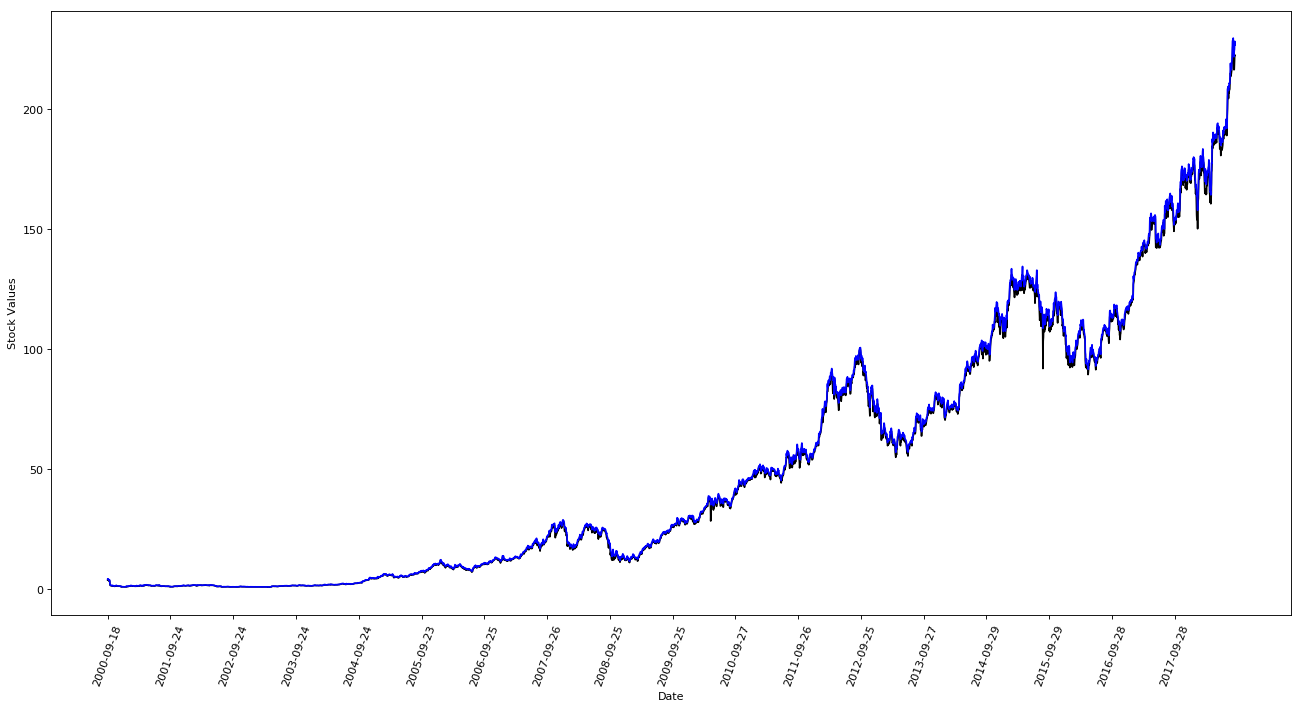

In [3]:
#viewing plot of AAPL data
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['Date'], df['Low'], color = 'black', label = 'Low')
plt.plot(df['Date'], df['High'], color = 'blue', label = 'High')
plt.xticks(df['Date'].loc[::252],rotation=70)
plt.xlabel('Date')
plt.ylabel('Stock Values')
plt.show()

In [4]:
scaler = MinMaxScaler()
OHLC_mean_scaled = OHLC_mean.reshape(-1,1)
OHLC_mean_scaled = scaler.fit_transform(OHLC_mean_scaled)
train_data = OHLC_mean_scaled[:4400]
test_data = OHLC_mean_scaled[4400:]

print(OHLC_mean_scaled)

[[0.01410179]
 [0.01465439]
 [0.01478824]
 ...
 [0.97609053]
 [0.98709353]
 [0.98500294]]


In [7]:
step_size = 1
X = OHLC_mean_scaled[:-step_size]
Y = OHLC_mean_scaled[step_size:]

trainX = X[:4400].reshape(-1, 1,1)
testX = X[4400:].reshape(-1, 1, 1)
trainY = Y[:4400]
testY = Y[4400:]




[[0.78085371]]


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=16, input_shape=(None, 1), return_sequences=True))
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(units=1))
model.compile( loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, batch_size=32, epochs=100, verbose = 1)

Using TensorFlow backend.


Epoch 1/100
4400/4400 [==============================] - 7s 2ms/step - loss: 0.0508
Epoch 2/100
4400/4400 [==============================] - 2s 513us/step - loss: 0.0114
Epoch 3/100
4400/4400 [==============================] - 2s 511us/step - loss: 2.3712e-04
Epoch 4/100
4400/4400 [==============================] - 2s 367us/step - loss: 8.5965e-05
Epoch 5/100
4400/4400 [==============================] - 1s 337us/step - loss: 4.5802e-05
Epoch 6/100
4400/4400 [==============================] - 1s 338us/step - loss: 3.2748e-05
Epoch 7/100
4400/4400 [==============================] - 2s 420us/step - loss: 2.7793e-05
Epoch 8/100
4400/4400 [==============================] - 2s 532us/step - loss: 2.4840e-05
Epoch 9/100
4400/4400 [==============================] - 2s 541us/step - loss: 2.2474e-05
Epoch 10/100
4400/4400 [==============================] - 2s 496us/step - loss: 2.1091e-05
Epoch 11/100
4400/4400 [==============================] - 2s 350us/step - loss: 2.0055e-05
Epoch 12/100
4400/

4400/4400 [==============================] - 1s 285us/step - loss: 1.6684e-05
Epoch 92/100
4400/4400 [==============================] - 1s 279us/step - loss: 1.9002e-05
Epoch 93/100
4400/4400 [==============================] - 1s 276us/step - loss: 1.6449e-05
Epoch 94/100
4400/4400 [==============================] - 1s 280us/step - loss: 1.7599e-05
Epoch 95/100
4400/4400 [==============================] - 1s 279us/step - loss: 1.8228e-05
Epoch 96/100
4400/4400 [==============================] - 1s 278us/step - loss: 1.6658e-05
Epoch 97/100
4400/4400 [==============================] - 1s 282us/step - loss: 1.7480e-05
Epoch 98/100
4400/4400 [==============================] - 1s 306us/step - loss: 1.7115e-05
Epoch 99/100
4400/4400 [==============================] - 1s 278us/step - loss: 1.6366e-05
Epoch 100/100
4400/4400 [==============================] - 1s 276us/step - loss: 1.5938e-05


In [8]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [10]:
testPredict_denorm = scaler.inverse_transform(testPredict)
testY_denorm = scaler.inverse_transform(testY)
from sklearn.metrics import r2_score
print(r2_score(testY_denorm, testPredict_denorm))
np.c_[testPredict_denorm, testY_denorm]

0.9829740294377011


array([[178.139328  , 175.93750375],
       [175.67979431, 175.55500375],
       [175.29098511, 173.164997  ],
       [172.86601257, 170.03250125],
       [169.6998291 , 167.04750025],
       [166.69587708, 170.09500475],
       [169.76287842, 171.02249525],
       [170.69895935, 167.2350005 ],
       [166.88418579, 168.55999775],
       [168.21638489, 166.68249875],
       [166.32945251, 167.41500075],
       [167.06500244, 168.31750125],
       [167.97236633, 172.92250075],
       [172.62042236, 170.00749975],
       [169.67463684, 170.7175025 ],
       [170.39099121, 172.94499975],
       [172.64318848, 172.57249825],
       [172.26608276, 173.897499  ],
       [173.60836792, 174.79999925],
       [174.52407837, 175.4675025 ],
       [175.20205688, 177.520004  ],
       [177.29058838, 177.8375015 ],
       [177.61418152, 173.65250025],
       [173.36000061, 168.24250025],
       [167.89691162, 165.77000025],
       [165.41427612, 164.04000075],
       [163.68257141, 163.52499775],
 

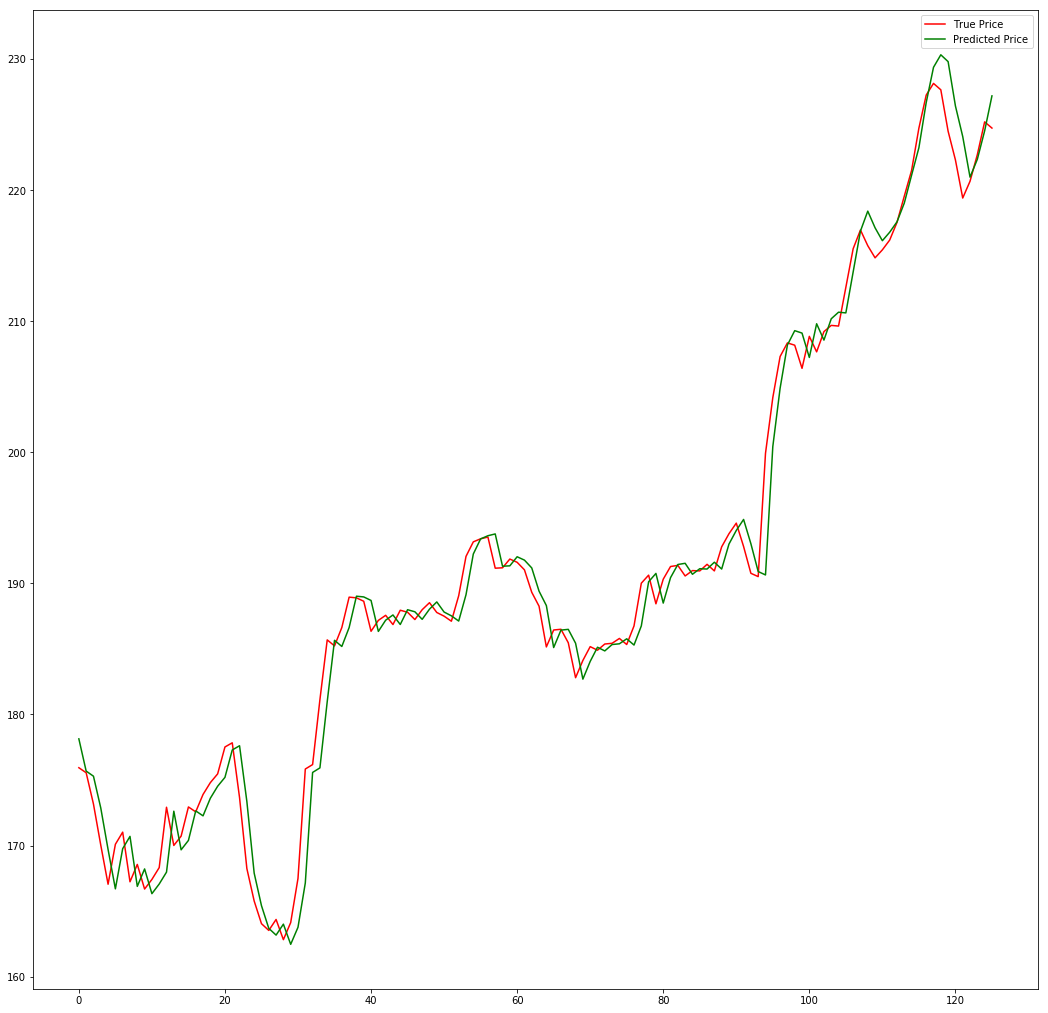

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize = (18,18))
plt.plot(testY_denorm, color = 'red', label = 'True Price')
plt.plot(testPredict_denorm, color = 'green', label = 'Predicted Price')
plt.legend()
plt.show()

In [13]:
preds_moving = []
moving_test_window = [trainX[-1].tolist()] #using the last element of the trainX data set to lead off the predictions 
moving_test_window = np.array(moving_test_window) 

for i in range(120):
    preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
    preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
    preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
    moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        


print(preds_moving)

[0.78221714, 0.7813066, 0.7803776, 0.7794299, 0.7784635, 0.77747816, 0.776474, 0.7754509, 0.7744087, 0.7733475, 0.77226734, 0.7711682, 0.77004987, 0.7689127, 0.7677567, 0.76658195, 0.76538867, 0.76417696, 0.7629468, 0.76169866, 0.7604326, 0.7591489, 0.7578479, 0.75652975, 0.75519484, 0.75384355, 0.7524762, 0.7510933, 0.7496953, 0.74828255, 0.7468556, 0.745415, 0.74396116, 0.7424947, 0.7410163, 0.7395265, 0.73802596, 0.73651534, 0.7349953, 0.7334666, 0.73192984, 0.73038584, 0.7288354, 0.7272793, 0.7257183, 0.7241532, 0.72258484, 0.721014, 0.71944165, 0.7178685, 0.7162954, 0.7147233, 0.71315295, 0.7115852, 0.71002096, 0.70846105, 0.70690626, 0.70535743, 0.70381546, 0.70228106, 0.7007551, 0.69923836, 0.69773144, 0.69623524, 0.6947504, 0.6932777, 0.6918178, 0.69037133, 0.68893903, 0.68752134, 0.6861189, 0.6847323, 0.68336195, 0.6820085, 0.6806724, 0.67935395, 0.6780537, 0.67677194, 0.67550904, 0.67426527, 0.673041, 0.67183644, 0.67065185, 0.6694874, 0.66834325, 0.6672195, 0.6661163, 0.6650